In [1]:
import numpy as np
import statsmodels.api as sm
from statsmodels import regression, stats
import statsmodels
import matplotlib.pyplot as plt

In [10]:
xs = np.arange(100)
y1 = xs + 3*np.random.randn(100)
y1

array([  2.08672117,  -0.53172521,   0.12960646,   2.10061802,
         3.52904502,   1.71739549,   3.7679004 ,  11.60029289,
         6.04153862,   7.03309536,   7.56579818,  10.39037729,
        19.04393773,   7.89019771,  18.35262767,  17.62882976,
        20.33184957,  17.6326198 ,  17.30010199,  23.34188522,
        22.86330048,  17.89637357,  21.10999183,  27.13418829,
        25.71387543,  23.75989608,  29.06204508,  23.96771424,
        31.54770158,  30.66800662,  25.30910723,  27.64113752,
        29.39224511,  33.49402295,  35.79889809,  33.36137901,
        33.20237107,  34.87555991,  38.94703008,  43.10163386,
        40.71390925,  37.61896775,  43.85059103,  40.04047876,
        44.37433388,  47.85197963,  53.56845234,  49.88388025,
        49.78654139,  49.23785837,  48.67926996,  46.70698066,
        55.89999994,  56.54108426,  47.4697349 ,  54.52098557,
        55.27353142,  57.81352585,  58.49151214,  62.49105173,
        57.88193789,  64.36578104,  58.15476241,  66.15

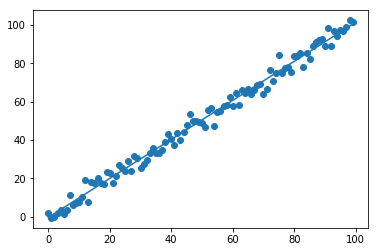

In [11]:
slr1 = regression.linear_model.OLS(y1, sm.add_constant(xs)).fit()

fit1 = slr1.params[0] + slr1.params[1] * xs

plt.scatter(xs, y1)
plt.plot(xs, fit1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     72.35
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           2.09e-13
Time:                        12:24:32   Log-Likelihood:                -492.50
No. Observations:                 100   AIC:                             989.0
Df Residuals:                      98   BIC:                             994.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3122      6.681      0.196      0.845     -11.946      14.571
x1             0.9917      0.117      8.506      0.000       0.760       1.223
==============================================================================
Omnibus:                       36.428   Durbin-Watson:                   2.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.447
Skew:                          -1.109   Prob(JB):                     1.17e-31
Kurtosis:                       8.410   Cond. No.                         114.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

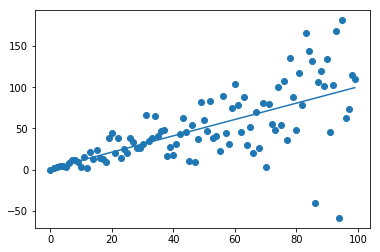

In [13]:
y2 = xs * (1+.5*np.random.randn(100))
slr2 = regression.linear_model.OLS(y2, sm.add_constant(xs)).fit()

fit2 = slr2.params[0] + slr2.params[1] * xs

plt.scatter(xs,y2)
plt.plot(xs,fit2)

slr2.summary()

In [16]:
residuals1 = y1 - fit1
print(residuals1)
residuals2 = y2 - fit2
print(residuals2)

[ 2.36178058 -1.2729125  -1.62782753 -0.67306268 -0.26088237 -3.08877861
 -2.05452041  4.76162538 -1.8133756  -1.83806556 -2.32160944 -0.51327704
  7.1240367  -5.04595002  4.40023324  2.66018862  4.34696172  0.63148525
 -0.71727926  4.30825726  2.81342582 -3.1697478  -0.97237623  4.03557352
  1.59901395 -1.3712121   2.91469019 -3.19588734  3.36785329  1.47191163
 -4.90323447 -3.58745089 -2.85259     0.23294114  1.52156957 -1.93219621
 -3.10745085 -2.45050871  0.60471475  3.74307183  0.33910051 -3.77208769
  1.44328889 -3.38307009 -0.06546168  2.39593737  7.09616338  2.39534458
  1.28175903 -0.2831707  -1.85800582 -4.84654182  3.33023076  2.95506838
 -7.13252769 -1.09752373 -1.36122457  0.16252315 -0.17573726  2.80755562
 -2.81780492  2.64979152 -4.57747381  2.41063459 -0.33342952  0.69785526
 -2.53796492 -1.65986111  0.03645689 -0.61312145 -7.00223485 -5.04067901
  3.38728748 -3.13257561  0.05221326  8.13510659 -1.91764465 -0.64291249
 -0.77110994 -4.58037128  3.01680824  1.6969061   2

In [25]:
_, jq_pvalue1,_,_ = statsmodels.stats.stattools.jarque_bera(residuals1)
_, jq_pvalue2,_,_ = statsmodels.stats.stattools.jarque_bera(residuals2)

_, bp_pvalue1,_,_ = stats.diagnostic.het_breuschpagan(residuals1, sm.add_constant(xs))
_, bp_pvalue2,_,_ = stats.diagnostic.het_breuschpagan(residuals2, sm.add_constant(xs))

print(jq_pvalue1, jq_pvalue2, bp_pvalue1, bp_pvalue2)

0.8357911063404039 1.1698136131183658e-31 0.7643369775445685 0.00011061892437569196


In [26]:
print(slr2.summary())
print(slr2.get_robustcov_results().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     72.35
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           2.09e-13
Time:                        12:58:40   Log-Likelihood:                -492.50
No. Observations:                 100   AIC:                             989.0
Df Residuals:                      98   BIC:                             994.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3122      6.681      0.196      0.8

In [27]:
!pip install pandas-datareader
from datetime import datetime
import pandas_datareader as pdr

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     507.7
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           3.93e-62
Time:                        13:08:01   Log-Likelihood:                -590.27
No. Observations:                 252   AIC:                             1185.
Df Residuals:                     250   BIC:                             1192.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.4543      0.318     89.609      0.000      27.829      29.080
x1             0.0493      0.002     22.532      0.000       0.045       0.054
==============================================================================
Omnibus:                       30.510   Durbin-Watson:                   0.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.725
Skew:                          -0.750   Prob(JB):                     1.94e-10
Kurtosis:                       4.418   Cond. No.                         289.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

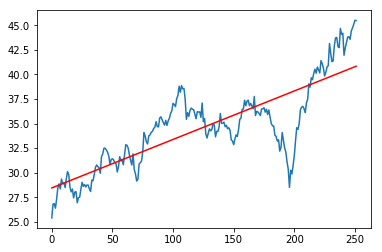

In [30]:
y = pdr.data.DataReader('DAL', data_source='yahoo', start=datetime(2014,1,1), end=datetime(2015,1,1)).iloc[:, -1]
x = np.arange(len(y))

model = regression.linear_model.OLS(y, sm.add_constant(x)).fit()

prediction = model.params[0] + model.params[1] * x

plt.plot(x,y)
plt.plot(x,prediction,color='r')

model.summary()

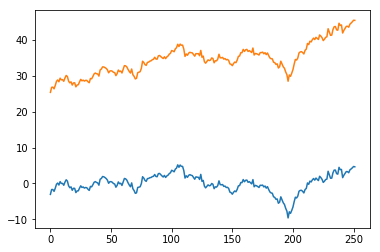

In [34]:
plt.plot(x, y-prediction)
plt.plot(x, y)

In [37]:
cov_mat = stats.sandwich_covariance.cov_hac(model)
print(model.bse[0], model.bse[1])
print(np.sqrt(cov_mat[0,0]))

0.31753879335839735 0.0021890292367691315
0.4679297058359416


0.9088250665454568
const   -12.600001
x1       25.305190
x2       -5.351276
dtype: float64


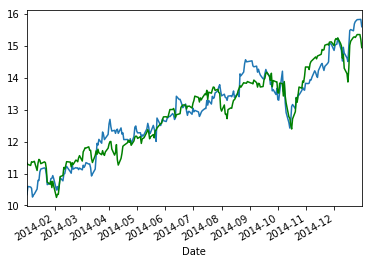

In [41]:
b1 = pdr.data.DataReader('SPY', data_source='yahoo', start=datetime(2014,1,1), end=datetime(2015,1,1)).iloc[:, -1]
b2 = pdr.data.DataReader('MDY', data_source='yahoo', start=datetime(2014,1,1), end=datetime(2015,1,1)).iloc[:, -1]
a = pdr.data.DataReader('HPQ', data_source='yahoo', start=datetime(2014,1,1), end=datetime(2015,1,1)).iloc[:, -1]

mlr = regression.linear_model.OLS(a, sm.add_constant(np.column_stack((b1,b2)))).fit()

mlr_prediction = mlr.params[0] + mlr.params[1] * b1 + mlr.params[2] * b2

print(mlr.rsquared_adj)
print(mlr.tvalues)

a.plot()
mlr_prediction.plot(color='g')

0.8987461691185845
const       -24.938987
Adj Close    47.211424
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


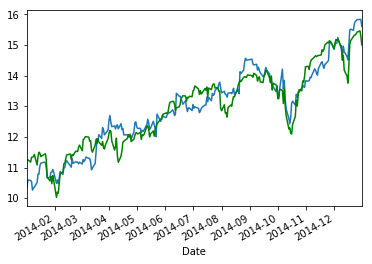

In [42]:
#drop one variable to attempt to get rid of multicollinearity
mlr = regression.linear_model.OLS(a, sm.add_constant(b1)).fit()

mlr_prediction = mlr.params[0] + mlr.params[1] * b1

print(mlr.rsquared_adj)
print(mlr.tvalues)

a.plot()
mlr_prediction.plot(color='g')